# 📰 Fake News Detection using NLP and Machine Learning

In today's digital age, fake news spreads rapidly through social media and online platforms, often causing widespread misinformation. The goal of this project is to build a robust machine learning model that can accurately classify whether a given news article is **real** or **fake** based on its content.

We'll use natural language processing (NLP) techniques to clean and vectorize the data, followed by model training and evaluation using different classification algorithms.


# 📚 Importing Libraries

We begin by importing essential Python libraries for data handling, text processing, visualization, and machine learning.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
print(stopwords.words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

# 📥 Loading and Exploring the Dataset

We'll load the dataset and perform an initial exploration to understand the structure and content. The dataset contains news articles with columns like `title`, `author`, `text`, and a `label` indicating whether the news is fake (1) or real (0).


In [6]:
df =pd.read_csv('/content/train_dataset.csv')

In [7]:
df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [8]:
df.shape

(20800, 5)

In [9]:
df.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [10]:
df.describe()

,id,label
count,20800.000000,20800.000000
mean,10399.500000,0.500625
std,6004.587135,0.500012
min,0.000000,0.000000
25%,5199.750000,0.000000
50%,10399.500000,1.000000
75%,15599.250000,1.000000
max,20799.000000,1.000000


from matplotlib import pyplot as plt
_df_0['id'].plot(kind='hist', bins=20, title='id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['label'].plot(kind='hist', bins=20, title='label')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='id', y='label', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['id'].plot(kind='line', figsize=(8, 4), title='id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['label'].plot(kind='line', figsize=(8, 4), title='label')
plt.gca().spines[['top', 'right']].set_visible(False)

In [11]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


# 🧹 Handling Missing Values

We identify and fill missing values to ensure smooth processing. Since `title` and `author` contain missing entries, we fill them with empty strings. Then we create a new feature by combining `author` and `title` into a `content` column for text analysis.


In [12]:
df.isnull().sum()

,0
id,0
title,558
author,1957
text,39
label,0


In [13]:
df=df.fillna('')

In [14]:
df['content']= df['author']+ ' '+df['title']

In [15]:
print(df['content'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object


In [16]:
X= df.drop(columns='label',axis=1)
Y=df['label']

In [17]:
print(X)
print(Y)

          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

# ✂️ Text Preprocessing and Stemming

To clean the text data:
- We remove non-alphabetic characters.
- Convert text to lowercase.
- Remove stopwords.
- Apply stemming using Porter Stemmer.

This prepares the text for vectorization.


In [18]:
port_stem = PorterStemmer()

In [19]:
def stemming(content):
  stemmed_content = re.sub('[^a-zA-Z]',' ',content)
  stemmed_content= stemmed_content.lower()
  stemmed_content= stemmed_content.split()
  stemmed_content= [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content= ' '.join(stemmed_content)
  return stemmed_content


In [20]:
df['content']=df['content'].apply(stemming)

In [21]:
print(df['content'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object


In [22]:
X= df['content'].values
Y=df['label'].values

In [23]:
print(X)


['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exercis balkan'
 'david swanson keep f aliv']


In [24]:
print(Y)

[1 0 1 ... 0 1 1]


In [25]:
Y.shape

(20800,)

# 🔠 Feature Extraction using TF-IDF

We convert the processed text data into numerical format using **TF-IDF Vectorizer**. This allows us to feed the data into machine learning models.


In [26]:
vectorizer= TfidfVectorizer()
vectorizer.fit(X)
X= vectorizer.transform(X)

In [27]:
print(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 210687 stored elements and shape (20800, 17128)>
  Coords	Values
  (0, 267)	0.2701012497770876
  (0, 2483)	0.36765196867972083
  (0, 2959)	0.24684501285337127
  (0, 3600)	0.3598939188262558
  (0, 3792)	0.27053324808454915
  (0, 4973)	0.23331696690935097
  (0, 7005)	0.2187416908935914
  (0, 7692)	0.24785219520671598
  (0, 8630)	0.2921251408704368
  (0, 8909)	0.36359638063260746
  (0, 13473)	0.2565896679337956
  (0, 15686)	0.2848506356272864
  (1, 1497)	0.2939891562094648
  (1, 1894)	0.15521974226349364
  (1, 2223)	0.3827320386859759
  (1, 2813)	0.19094574062359204
  (1, 3568)	0.26373768806048464
  (1, 5503)	0.7143299355715573
  (1, 6816)	0.1904660198296849
  (1, 16799)	0.30071745655510157
  (2, 2943)	0.3179886800654691
  (2, 3103)	0.46097489583229645
  (2, 5389)	0.3866530551182615
  (2, 5968)	0.3474613386728292
  (2, 9620)	0.49351492943649944
  :	:
  (20797, 3643)	0.2115550061362374
  (20797, 7042)	0.21799048897828685
  (2079

# 📊 Class Distribution

We visualize the distribution of real vs fake news articles in the dataset to check for class balance.


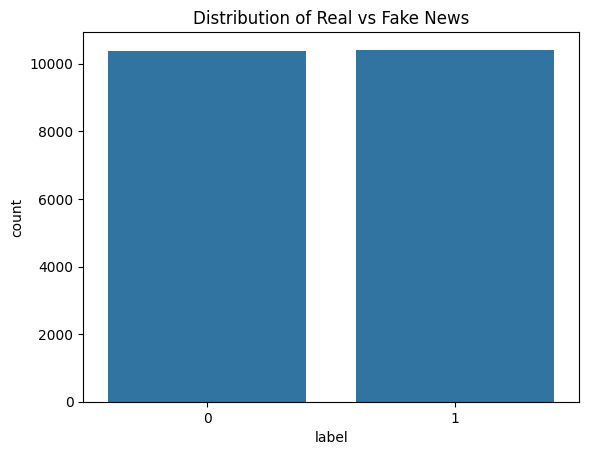

In [28]:
# Class Distribution
sns.countplot(x='label', data=df)
plt.title('Distribution of Real vs Fake News')
plt.show()

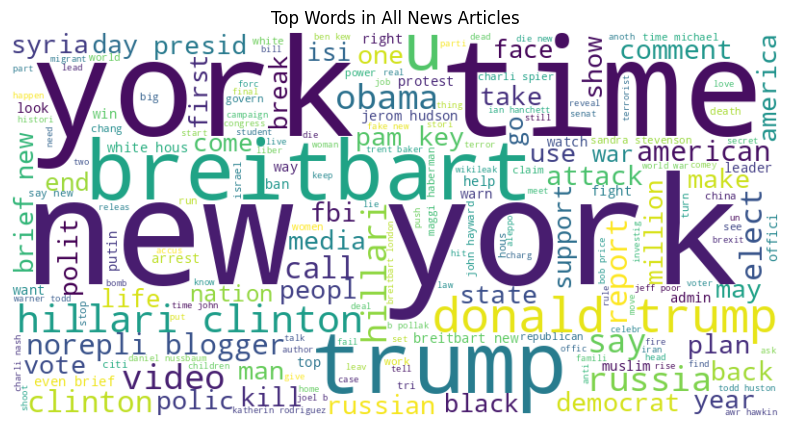

In [30]:
from wordcloud import WordCloud
# Generate WordCloud
text = ' '.join(df['content'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display it
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top Words in All News Articles')
plt.show()


# 🤖 Model Training and Evaluation

We train and evaluate multiple models:
- Logistic Regression
- Multinomial Naive Bayes
- Support Vector Machine (SVM)

We evaluate each model using accuracy, precision, recall, F1-score, and a confusion matrix.


In [31]:
X = df['content'].values
Y = df['label'].values


In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [59]:
# Fit on the training text data
vectorizer.fit(X_train)


TfidfVectorizer()

In [60]:
# transform both training and testing data
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [35]:
model = LogisticRegression()

In [36]:
model.fit(X_train, Y_train)

LogisticRegression()

In [37]:
X_test_prediction= model.predict(X_test)
test_data_accuracy= accuracy_score(X_test_prediction, Y_test)

In [38]:
from sklearn.model_selection import GridSearchCV

# Grid search for Logistic Regression
param_grid_logreg = {
    'C': [0.01, 0.1, 1, 10],
    'max_iter': [100, 200, 500],
    'solver': ['liblinear']  # Good for small datasets or binary classification
}

grid_logreg = GridSearchCV(LogisticRegression(), param_grid_logreg, cv=5, scoring='accuracy')
grid_logreg.fit(X_train, Y_train)

print("Logistic Regression Best Params:", grid_logreg.best_params_)
print(" Logistic Regression Best Score:", grid_logreg.best_score_)

Logistic Regression Best Params: {'C': 10, 'max_iter': 100, 'solver': 'liblinear'}
 Logistic Regression Best Score: 0.9878004807692309


===== Logistic Regression =====
 Accuracy: 0.9896634615384615

📋 Classification Report:
              precision    recall  f1-score   support

        Fake       0.99      0.97      0.98      2077
        Real       0.97      0.99      0.98      2083

    accuracy                           0.98      4160
   macro avg       0.98      0.98      0.98      4160
weighted avg       0.98      0.98      0.98      4160



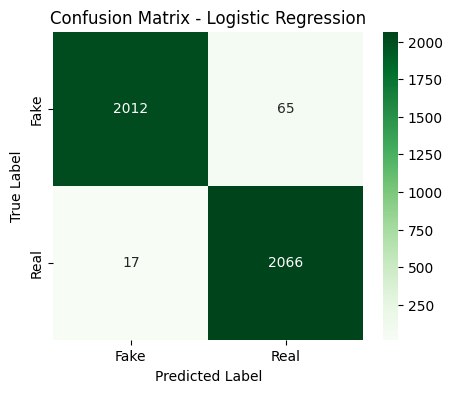

In [39]:
# Logistic Regression
best_logreg = grid_logreg.best_estimator_

# Predictions
Y_pred = best_logreg.predict(X_test)
# Accuracy
print("===== Logistic Regression =====")
print(f" Accuracy: {accuracy_score(Y_test, Y_pred)}")

# Classification Report
print("\n📋 Classification Report:")
print(classification_report(Y_test, X_test_prediction, target_names=['Fake', 'Real']))

# Confusion Matrix
cm = confusion_matrix(Y_test, X_test_prediction)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# 📈 ROC-AUC Curve

We plot the ROC curve to visualize the trade-off between true positive rate and false positive rate for the best-performing model.


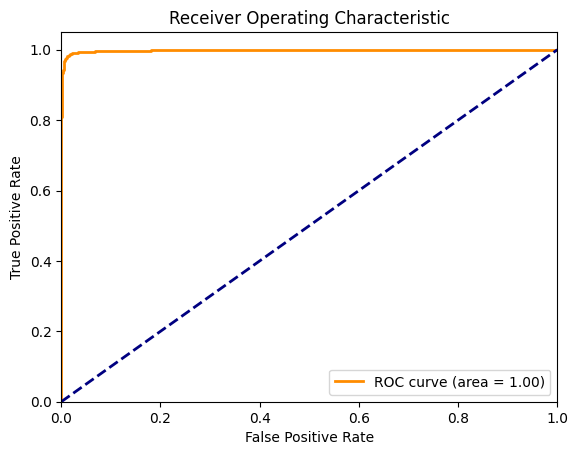

In [40]:
from sklearn.metrics import roc_curve, auc
model = LogisticRegression()
model.fit(X_train, Y_train)
y_probs = model.predict_proba(X_test)[:, 1]


fpr, tpr, thresholds = roc_curve(Y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# 🔁 Cross-Validation

We use **5-fold cross-validation** to ensure model stability and generalizability across different data splits.

In [56]:
from sklearn.model_selection import cross_val_score

vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Cross validation score
cv_scores = cross_val_score(model, X_vectorized, Y, cv=5)

print("Cross-validation scores: ", cv_scores)
print("Mean cross-validation score: ", cv_scores.mean())

Cross-validation scores:  [0.98942308 0.98629808 0.99158654 0.98966346 0.98822115]
Mean cross-validation score:  0.9890384615384615


In [42]:
#Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

# Grid search for Naive Bayes
param_grid_nb = {
    'alpha': [0.01, 0.1, 1.0, 5.0]
}

grid_nb = GridSearchCV(MultinomialNB(), param_grid_nb, cv=5, scoring='accuracy')
grid_nb.fit(X_train, Y_train)

print(" Naive Bayes Best Params:", grid_nb.best_params_)
print("Naive Bayes Best Score:", grid_nb.best_score_)



 Naive Bayes Best Params: {'alpha': 1.0}
Naive Bayes Best Score: 0.9504807692307692


 Accuracy on Test Data: 0.9543269230769231

📋 Classification Report:
              precision    recall  f1-score   support

        Fake       0.92      0.99      0.96      2077
        Real       0.99      0.92      0.95      2083

    accuracy                           0.95      4160
   macro avg       0.96      0.95      0.95      4160
weighted avg       0.96      0.95      0.95      4160



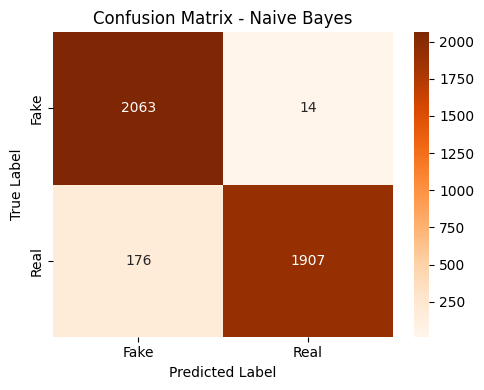

In [43]:
best_nb = grid_nb.best_estimator_

# 🧪 Step 3: Predict on Test Set
nb_preds = best_nb.predict(X_test)

# 🎯 Step 4: Accuracy
nb_accuracy = accuracy_score(Y_test, nb_preds)
print(f" Accuracy on Test Data: {nb_accuracy}")

# 📋 Step 5: Classification Report
print("\n📋 Classification Report:")
print(classification_report(Y_test, nb_preds, target_names=['Fake', 'Real']))

# 🔲 Step 6: Confusion Matrix
cm = confusion_matrix(Y_test, nb_preds)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

In [44]:
#SVM
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'max_iter': [1000, 2000]
}

grid = GridSearchCV(LinearSVC(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, Y_train)

print("Best Params:", grid.best_params_)
print("Best Score:", grid.best_score_)

Best Params: {'C': 10, 'max_iter': 1000}
Best Score: 0.9930288461538461


Model Accuracy: 0.9927884615384616

📋 Classification Report:
              precision    recall  f1-score   support

        Fake       0.99      1.00      0.99      2077
        Real       1.00      0.99      0.99      2083

    accuracy                           0.99      4160
   macro avg       0.99      0.99      0.99      4160
weighted avg       0.99      0.99      0.99      4160



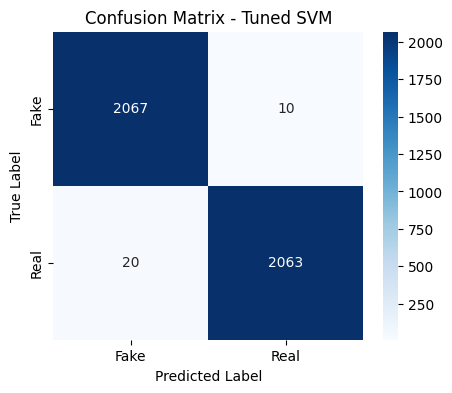

In [45]:
best_model = grid.best_estimator_

# Predict on test data
X_test_prediction = best_model.predict(X_test)

# Evaluate
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(Y_test, X_test_prediction)
print(f"Model Accuracy: {accuracy}")

# Classification Report
print("\n📋 Classification Report:")
print(classification_report(Y_test, X_test_prediction, target_names=['Fake', 'Real']))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(Y_test, X_test_prediction)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title("Confusion Matrix - Tuned SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# 🏆 Model Comparison

We compare the models side-by-side using a bar chart to find the best model in terms of accuracy, precision, recall, and F1 score.


In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {
    'LinearSVC': best_model,
    'MultinomialNB': best_nb,
    'LogisticRegression': best_logreg
}

# Store evaluation results
results = []

for name, model in models.items():
    predictions = model.predict(X_test)

    results.append({
        'Model': name,
        'Accuracy': accuracy_score(Y_test, predictions),
        'Precision': precision_score(Y_test, predictions, average='binary'),
        'Recall': recall_score(Y_test, predictions, average='binary'),
        'F1 Score': f1_score(Y_test, predictions, average='binary')
    })

# Create a DataFrame
df_results = pd.DataFrame(results)

# Sort and print
df_sorted = df_results.sort_values(by='F1 Score', ascending=False)
print(df_sorted)

                Model  Accuracy  Precision    Recall  F1 Score
0           LinearSVC  0.992788   0.995176  0.990398  0.992782
2  LogisticRegression  0.989663   0.988506  0.990879  0.989691
1       MultinomialNB  0.954327   0.992712  0.915506  0.952547


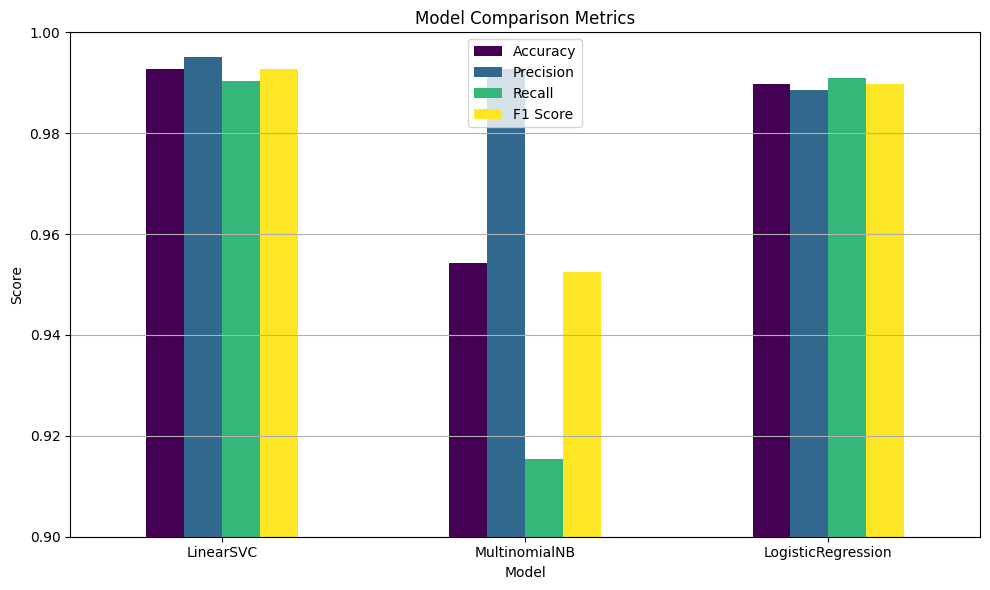

In [47]:
import matplotlib.pyplot as plt

df_results.set_index("Model")[["Accuracy", "Precision", "Recall", "F1 Score"]].plot(kind='bar', figsize=(10,6), colormap='viridis')
plt.title("Model Comparison Metrics")
plt.ylabel("Score")
plt.ylim(0.9, 1.0)
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


##  📊 Model Comparison Insights




🔍 Model Insight:
- **LinearSVC** performed the best with **99.27% accuracy** and a **99.27% F1 Score**, making it the most reliable model for fake news detection.
- **Logistic Regression** was close behind with **98.96% accuracy** and a strong balance of precision and recall.
- **Multinomial Naive Bayes** achieved **95.43% accuracy**, but had a lower recall, meaning it missed more fake news compared to SVM and Logistic Regression.

**🏆 Conclusion:**  
The **LinearSVC model** is the most suitable for deployment, as it consistently provides the highest accuracy, precision, recall, and F1 score across the dataset.  
Its robust performance makes it ideal for real-world fake news detection tasks.


# 🧪 Making Predictions

We test the model on a new news article to see if it correctly classifies the input as fake or real.


In [48]:
X_new= X_test[1]
prediction= model.predict(X_new)
print(prediction)
if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')


[0]
The news is Real


# 🧠 SHAP Explainability

We use SHAP (SHapley Additive exPlanations) to interpret the model's predictions and understand which words contribute most to the decision-making process.


In [52]:
!pip install shap
import shap


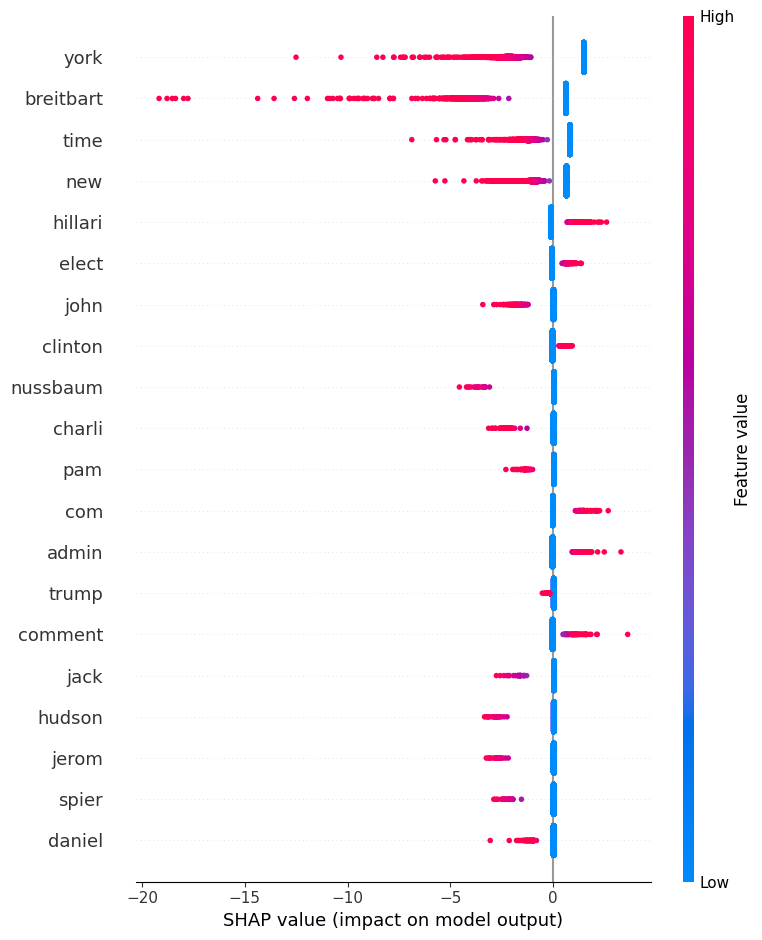

In [61]:
explainer = shap.Explainer(model, X_train, feature_names=vectorizer.get_feature_names_out())
shap_values = explainer(X_test)

feature_names = vectorizer.get_feature_names_out()
X_test_dense = pd.DataFrame(X_test.toarray(), columns=feature_names)
shap.summary_plot(shap_values, X_test_dense, feature_names=feature_names, plot_type="dot")

# ✅ Conclusion

- The SVM model achieved the highest accuracy (~99%).
- Text preprocessing and TF-IDF were effective in capturing patterns in news articles.
- SHAP helped interpret the model's inner workings.
- This project shows the power of NLP and machine learning in combating fake news.

**Next Steps:**
- Deploy as a Streamlit app.
- Try deep learning models like LSTMs or BERT.

